In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
def picture(model):
    n_features = X.shape[1]
    plt.figure()
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

In [3]:
#匯入資料
import pandas as pd
data = pd.read_csv("C:\\Traffic_Volume.csv")

data = data.drop(["holiday","weather_main","weather_main","weather_description","date_time"], axis=1)
data = data.dropna()


In [4]:
#切割訓練、測試集
X = data.drop(["traffic_volume"], axis=1)
y = data["traffic_volume"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [5]:
#資料標準化
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features, columns=data.columns[:-1])

In [6]:
#KNN(n=3)調整前
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.astype("string"))
pred = knn.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("KNN調整前之MAE:", MAE)
print("KNN調整前之RMSE:", math.sqrt(MAE))
print("KNN調整前之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN調整前之MSE: 5756268.314202738
KNN調整前之RMSE: 2399.2224395005014
KNN調整前之MAPE: 2.1258297916234077


In [7]:
#SVR調整前
svr = svm.SVR(C=1)
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("SVR調整前之MSE:", MAE)
print("SVR調整前之RMSE:", math.sqrt(MAE))
print("SVR調整前之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

SVR調整前之MSE: 3922843.0256439866
SVR調整前之RMSE: 1980.6168295871837
SVR調整前之MAPE: 2.907526830453834


In [8]:
#RandomForest調整前
randomForest = RandomForestRegressor(n_estimators=100, criterion = "mse")
randomForest.fit(X_train, y_train)
pred = randomForest.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("RandomForest調整前之MSE:", MAE)
print("RandomForest調整前之RMSE:", math.sqrt(MAE))
print("RandomForest調整前之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForest調整前之MSE: 4060102.555252331
RandomForest調整前之RMSE: 2014.9696164588515
RandomForest調整前之MAPE: 2.26656789142996


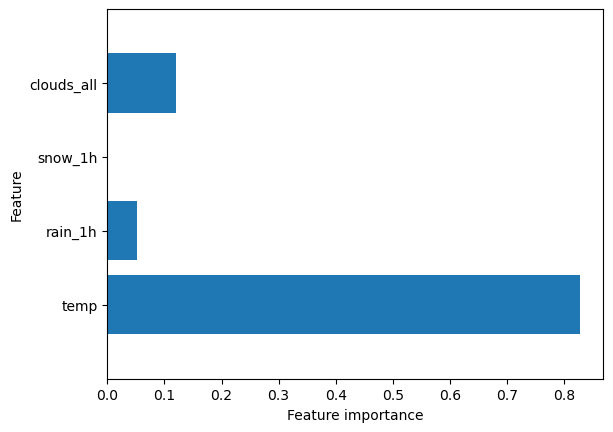

In [9]:
#特徵重要性-以RandomForest Model找尋重要性最高之特徵
picture(randomForest)

In [11]:
#刪除重要性最高之特徵-LDAPS_Tmax_lapse
X_train = X_train.drop(["temp"], axis=1)
X_test = X_test.drop(["temp"], axis=1)

In [12]:
#KNN(n=3)調整後
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.astype("string"))
pred = knn.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("KNN調整後之MSE:", MAE)
print("KNN調整後之RMSE:", math.sqrt(MAE))
print("KNN調整後之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN調整後之MSE: 5716983.0406582765
KNN調整後之RMSE: 2391.0213383945943
KNN調整後之MAPE: 1.8955605951249541


In [13]:
#SVR調整後
svr = svm.SVR(C=1)
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("SVR調整後之MSE:", MAE)
print("SVR調整後之RMSE:", math.sqrt(MAE))
print("SVR調整後之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

SVR調整後之MSE: 3908589.2848356646
SVR調整後之RMSE: 1977.0152464853843
SVR調整後之MAPE: 2.9047807729028934


In [14]:
#RandomForest調整後
randomForest = RandomForestRegressor(n_estimators=100, criterion = "mse")
randomForest.fit(X_train, y_train)
pred = randomForest.predict(X_test)

MAE = metrics.mean_squared_error(y_test, pred)

print("RandomForest調整後之MSE:", MAE)
print("RandomForest調整後之RMSE:", math.sqrt(MAE))
print("RandomForest調整後之MAPE:", metrics.mean_absolute_percentage_error(y_test, pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForest調整後之MSE: 3766617.6730504786
RandomForest調整後之RMSE: 1940.777594947571
RandomForest調整後之MAPE: 2.5809912600888145
